# SKLearn: Feature Scaling and Categorical Variables

In this notebook we will build off your [previous SKLearn notebook](SKLearn-and-KNN.ipynb) and introduce SKLearn Transformers.


## Notebook setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

# styling additions
from IPython.display import HTML
style = '''
    <style>
        div.info{
            padding: 15px; 
            border: 1px solid transparent; 
            border-left: 5px solid #dfb5b4; 
            border-color: transparent; 
            margin-bottom: 10px; 
            border-radius: 4px; 
            background-color: #fcf8e3; 
            border-color: #faebcc;
        }
        hr{
            border: 1px solid;
            border-radius: 5px;
        }
    </style>'''
HTML(style)

# Load in Data

We will continue with the `iris` dataset from the last lecture

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)   # recall - returns a Bunch object
iris_df = iris.data
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Lets make some slight additions to it here, which will help us do some demonstrations below.

I'm going to:
- add the class label here under `species`
- make up a random new "feature" which is the `size` of the flower
- drop some random values

In [3]:
# adding class names
iris_df['species'] = iris.target
label_name_dict = {val:key for key,val in zip(iris.target_names,range(3))}
iris_df['species'] = iris_df['species'].map(label_name_dict)

# random size feature
iris_df['size'] = np.random.choice(['S','M','XXL'], size=150)
iris_df['color'] = np.random.choice(['green','blue','red'], size=150)

# blanking out some random data
iris_df['petal length (cm)'] = iris_df['petal length (cm)']*np.random.choice([np.nan,1],size=150,p=[0.2,0.8])
iris_df['petal width (cm)'] = iris_df['petal width (cm)']*np.random.choice([np.nan,1],size=150,p=[0.2,0.8])

Now it looks like this:

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,size,color
0,5.1,3.5,1.4,0.2,setosa,S,blue
1,4.9,3.0,1.4,NaN,setosa,S,green
2,4.7,3.2,NaN,0.2,setosa,S,green
3,4.6,3.1,1.5,0.2,setosa,M,blue
4,5.0,3.6,1.4,0.2,setosa,M,blue
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,XXL,red
146,6.3,2.5,NaN,1.9,virginica,S,green
147,6.5,3.0,5.2,2.0,virginica,S,red
148,6.2,3.4,5.4,2.3,virginica,XXL,green


# Feature Scaling

As we saw at the end of the last notebook, if our features are on different 'scales', we must think about what this means and whether or not we want this to be the case. Some methods in ML wont care about the scales, some will. 

Some numerical methods, like **gradient descent** work better when our dataset has been 'scaled'. 

There are **many** different ways to "scale" your data, but two of the most common ones are:
- min/max scaling
- standardizing/normalizing/z-scoring

## Min/Max scaling

<br/>
<div class='info'>

<font size='5'>📖</font> **Definition:**  min/max scaling your dataset *maps* your dataset onto the range $(0,1)$ by:
    
$$
\boldsymbol{x}_{\text{norm}} = \frac{\boldsymbol{x} - x_{\text{min}} }{ x_{\text{max}} - x_{\text{min}} }
$$

</div>


Lets take a look at this piece by piece:

In [5]:
x = np.arange(20,37)
x

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

In [6]:
x - x.min()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [7]:
x.max() - x.min()

16

In [8]:
x_norm = (x - x.min()) / (x.max() - x.min())
x_norm

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    ])

Lets try this with a feature in our dataset. 

Lets first note what its like originally:

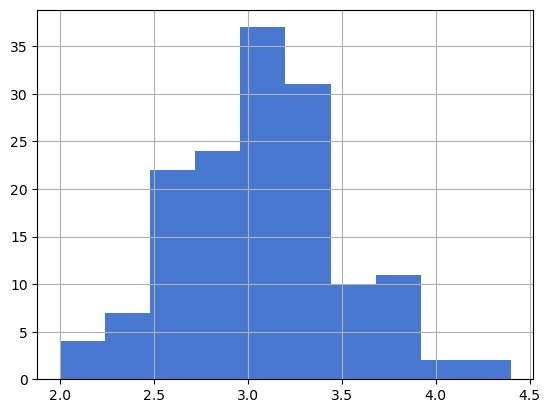

In [9]:
iris_df.iloc[:,1].hist();

Ok lets now shift it over:

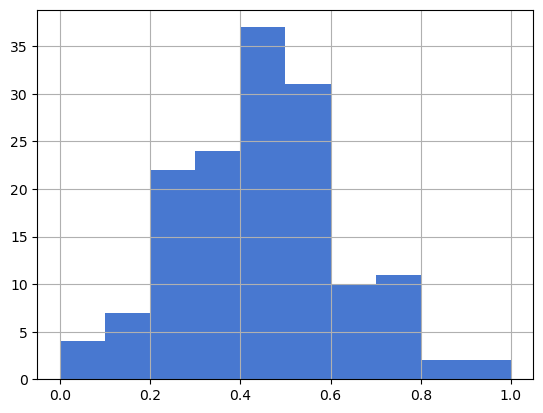

In [10]:
min_val = iris_df.iloc[:,1].min()
max_val = iris_df.iloc[:,1].max()
norm_vals = (iris_df.iloc[:,1] - min_val) / (max_val - min_val)
norm_vals.hist();

What has changed?! Lets see them both together:

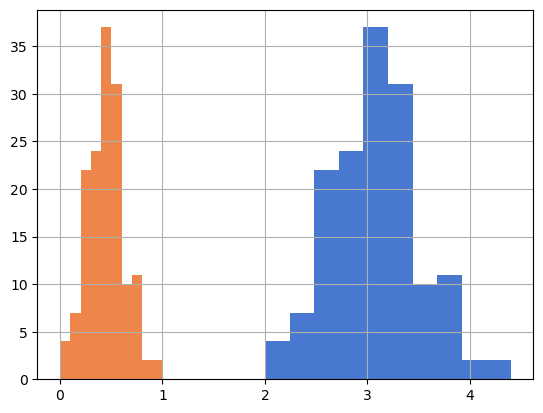

In [11]:
iris_df.iloc[:,1].hist();
norm_vals.hist();

Hm. Lets separate out the x-axis to verify:

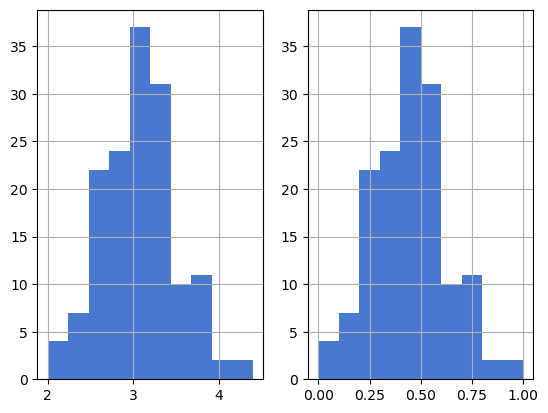

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2)
iris_df.iloc[:,1].hist(ax=ax1);
norm_vals.hist(ax=ax2);

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  What do we conclude? Comment below!

</div>

---

---

### Try it!

<br/>
<div class='info'>

<font size='5'>⌨️</font> **CODE IT UP:**  Below, try it yourself on a different column of the `iris` dataset:

</div>

---


---

## Standardization/Normalization

"Standardizing" or "Normalizing" or "Z-scoring" our data is very useful when working with certain optimization methods (e.g., gradient descent) or certain ML methods.

After **standardizing** a feature, it will have:
- unit variance 
- zero mean 

<div class='alert alert-block alert-danger'>

<font size='5'>⚠️</font> **Note:** This does **not** transform a feature from not following a normal distribution to a normal distributed one! 

</div>


<br/>
<div class='info'>

<font size='5'>📖</font> **Definition:**  To **standardize/normalize** a feature, you subtract its sample-mean, and divide by its sample-variance:
    
$$
\boldsymbol{x}_{\text{std}} = \frac{\boldsymbol{x} - \mu_x }{ \sigma_{x} }
$$

</div>

As above, lets take a look at this piece by piece

In [13]:
x = np.arange(20,37)
x

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

In [14]:
x - x.mean()

array([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,
        5.,  6.,  7.,  8.])

In [15]:
x_std = (x - x.mean()) / x.std()
x_std

array([-1.63299316, -1.42886902, -1.22474487, -1.02062073, -0.81649658,
       -0.61237244, -0.40824829, -0.20412415,  0.        ,  0.20412415,
        0.40824829,  0.61237244,  0.81649658,  1.02062073,  1.22474487,
        1.42886902,  1.63299316])

As above, lets try this with a feature in our dataset. 

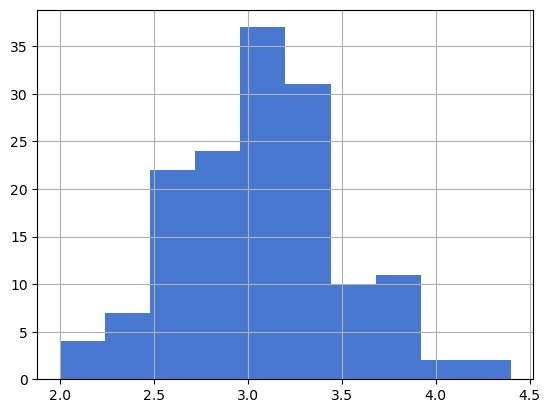

In [16]:
iris_df.iloc[:,1].hist();

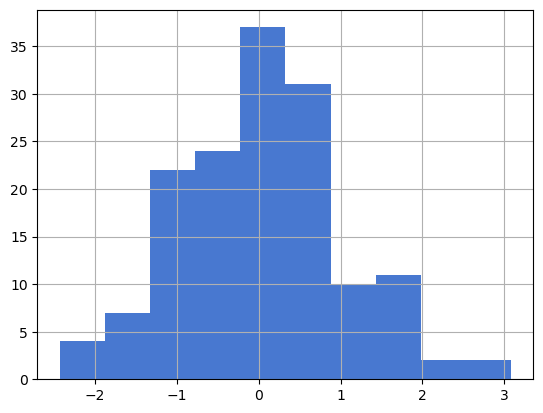

In [17]:
mean = iris_df.iloc[:,1].mean()
std = iris_df.iloc[:,1].std()
std_vals = (iris_df.iloc[:,1] - mean) / (std)
std_vals.hist();

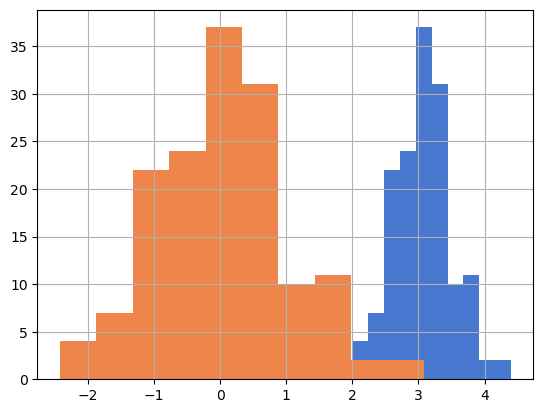

In [18]:
iris_df.iloc[:,1].hist();
std_vals.hist();

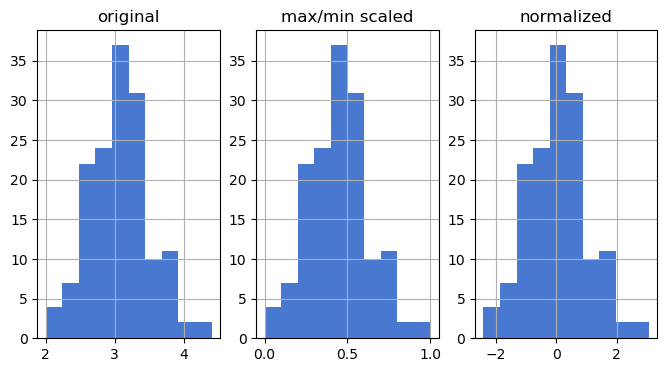

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(8,4))
iris_df.iloc[:,1].hist(ax=ax1);
ax1.set_title('original')
norm_vals.hist(ax=ax2)
ax2.set_title('max/min scaled')
std_vals.hist(ax=ax3);
ax3.set_title('normalized');

### Try it!

<br/>
<div class='info'>

<font size='5'>⌨️</font> **CODE IT UP:**  Below, try it yourself on a different column of the `iris` dataset:

</div>

---

---

# SKLearn Transformers

SKLearn provides utility objects called **Transformers** which make these operations very easy for us:

![](../assets/sk-transformers.jpg)

We can do this ourselves, but these transformer objects will let us easily assemble "pipelines" later on.

In [20]:
X = iris_df.iloc[:,:4]

First the `MinMaxScaler`:

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit(X).transform(X)
X_scaled[:5,:]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661,        nan],
       [0.11111111, 0.5       ,        nan, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

And now the `StandardScaler`:

In [22]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit(X).transform(X)
X_std[:5,:]

array([[-0.90068117,  1.01900435, -1.35324588, -1.3352222 ],
       [-1.14301691, -0.13197948, -1.35324588,         nan],
       [-1.38535265,  0.32841405,         nan, -1.3352222 ],
       [-1.50652052,  0.09821729, -1.29617277, -1.3352222 ],
       [-1.02184904,  1.24920112, -1.35324588, -1.3352222 ]])

---

# Dealing with Categorical Data:


When we preprocess a dataset as input to a machine learning algorithm, **we have to be careful how we treat categorical variables.**

<br/>
<div class='info'>

<font size='5'>📖</font> **Definition:**  A **categorical variable** is a "non-numeric" variable from a finite list of possibilities. There are two broad categories of categorical variables:
- nominal (no order implied) and 
- ordinal (order implied).

</div>


<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  The "non-numeric" here is used very loosely. As "0,1,2" could be a category. 

</div>


Looking at this version of the `iris` dataset (remember - we customized it above) we have an example of an **ordinal** variable called `size`:

In [23]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,size,color
0,5.1,3.5,1.4,0.2,setosa,S,blue
1,4.9,3.0,1.4,NaN,setosa,S,green
2,4.7,3.2,NaN,0.2,setosa,S,green
3,4.6,3.1,1.5,0.2,setosa,M,blue
4,5.0,3.6,1.4,0.2,setosa,M,blue


In order for us to feed this into many machine learning algorithms, we need to change this into a numeric value that captures this ordering of the categories. 

<div class='alert alert-block alert-danger'>

<font size='5'>☝🏽</font> **Note:** The range and difference between categories depends on our **domain knowledge and judgement!** 

</div>

In other words, what should we assign the values in the `size` column?

In [24]:
iris_df['size'].unique()

array(['S', 'M', 'XXL'], dtype=object)

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:** Lets discuss this point in class and jot down some ideas/questions below:

</div>

---

---

After some thought above fill this in:

In [25]:
mapping_dict = {'S': 2,
                'M': 3,
                'XXL': 5}

Now we're ready to change this column using `pandas` `.map` function that we've seen before: 

In [26]:
pd.Series.map?

In [27]:
iris_df['size'].map(mapping_dict)

0      2
1      2
2      2
3      3
4      3
      ..
145    5
146    2
147    2
148    5
149    5
Name: size, Length: 150, dtype: int64

In [28]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,size,color
0,5.1,3.5,1.4,0.2,setosa,S,blue
1,4.9,3.0,1.4,NaN,setosa,S,green
2,4.7,3.2,NaN,0.2,setosa,S,green
3,4.6,3.1,1.5,0.2,setosa,M,blue
4,5.0,3.6,1.4,0.2,setosa,M,blue


<font size="5">🧐🤨 What happened?! </font>

<div class='alert alert-block alert-danger'>

<font size='5'>☝🏽</font> **Note:** Many `pandas` functions do **not** modify a dataframe in place. Instead the return the new modified object and you must save it yourself!  

</div>

In [29]:
iris_df['remapped_size'] = iris_df['size'].map(mapping_dict)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,size,color,remapped_size
0,5.1,3.5,1.4,0.2,setosa,S,blue,2
1,4.9,3.0,1.4,NaN,setosa,S,green,2
2,4.7,3.2,NaN,0.2,setosa,S,green,2
3,4.6,3.1,1.5,0.2,setosa,M,blue,3
4,5.0,3.6,1.4,0.2,setosa,M,blue,3


Lets now take a look at a classic example of **nominal variable**: **class-label**!

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Why is this a nominal variable? What does that mean? Comment below!

</div>

---

---



Lets look at `iris_df` again:

In [30]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,size,color,remapped_size
0,5.1,3.5,1.4,0.2,setosa,S,blue,2
1,4.9,3.0,1.4,NaN,setosa,S,green,2
2,4.7,3.2,NaN,0.2,setosa,S,green,2
3,4.6,3.1,1.5,0.2,setosa,M,blue,3
4,5.0,3.6,1.4,0.2,setosa,M,blue,3


<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  We are *ignoring* the fact that we actually do have class-labels in the `iris.target` variable, and that we created the `species` column ourselves. Lets pretend our dataset actually came like this!

</div>

So we want to somehow change the class labels to be numeric, so that we can use them in our algorithms. 

We could always use the `.map` method like we did above, but lets show another way thats built into `sklearn` using the `LabelEncoder` class:

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(iris_df['species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Lets me a few notes about what we did here:
 - the species column was given unique numeric labels 
 - we used a nice new shortcut `fit_transform` which does both methods at once! Lets confirm this:

In [32]:
np.all(
    label_encoder.fit(iris_df['species']).transform(iris_df['species']) 
    == label_encoder.fit_transform(iris_df['species'])
)

True

Now we need to save this somewhere:

In [33]:
iris_df['class'] = label_encoder.fit_transform(iris_df['species'])

In [34]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,size,color,remapped_size,class
0,5.1,3.5,1.4,0.2,setosa,S,blue,2,0
1,4.9,3.0,1.4,NaN,setosa,S,green,2,0
2,4.7,3.2,NaN,0.2,setosa,S,green,2,0
3,4.6,3.1,1.5,0.2,setosa,M,blue,3,0
4,5.0,3.6,1.4,0.2,setosa,M,blue,3,0


<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:** A common point of confusion is that the class-label is being represented by a number - but we are saying this is a **nominal** value. Lets think about this together and jot down some notes in class! Comment below!

</div>

---

---

Lets deal with another **nominal** variable `color`. This is **not** an independent variable, so we do need to deal with it a bit more carefully! 

If we just did the same as we did above and gave this a numeric value, many ML algorithms will *treat it* as a number! 

Instead, one way we typically deal with this is called **one-hot encoding**:

<br/>
<div class='info'>

<font size='5'>📖</font> **Definition:** A variable is **one-hot encoded** by creating **dummy** variables for each of its possible values. 

</div>

So for the variable `color` we have:

In [35]:
iris_df['color'].unique()

array(['blue', 'green', 'red'], dtype=object)

Three different values, so we create three different **dummy** variables. 

We could do this manually (challenge: try it!), but `pandas` provides a built in `.get_dummies` method for us!

In [36]:
pd.get_dummies(iris_df,columns=['color'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,size,remapped_size,class,color_blue,color_green,color_red
0,5.1,3.5,1.4,0.2,setosa,S,2,0,1,0,0
1,4.9,3.0,1.4,NaN,setosa,S,2,0,0,1,0
2,4.7,3.2,NaN,0.2,setosa,S,2,0,0,1,0
3,4.6,3.1,1.5,0.2,setosa,M,3,0,1,0,0
4,5.0,3.6,1.4,0.2,setosa,M,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,XXL,5,2,0,0,1
146,6.3,2.5,NaN,1.9,virginica,S,2,2,0,1,0
147,6.5,3.0,5.2,2.0,virginica,S,2,2,0,0,1
148,6.2,3.4,5.4,2.3,virginica,XXL,5,2,0,1,0


This returns a new dataframe with our dummy variables appended as new columns, so lets "replace" our old dataframe with this one:

In [37]:
iris_df = pd.get_dummies(iris_df,columns=['color'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,size,remapped_size,class,color_blue,color_green,color_red
0,5.1,3.5,1.4,0.2,setosa,S,2,0,1,0,0
1,4.9,3.0,1.4,NaN,setosa,S,2,0,0,1,0
2,4.7,3.2,NaN,0.2,setosa,S,2,0,0,1,0
3,4.6,3.1,1.5,0.2,setosa,M,3,0,1,0,0
4,5.0,3.6,1.4,0.2,setosa,M,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,XXL,5,2,0,0,1
146,6.3,2.5,NaN,1.9,virginica,S,2,2,0,1,0
147,6.5,3.0,5.2,2.0,virginica,S,2,2,0,0,1
148,6.2,3.4,5.4,2.3,virginica,XXL,5,2,0,1,0


<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  This introduced three new dummy variables for a categorical variable that could take on three possible variables. Could we do better? Lets discuss and comment below!

</div>

---

---